# Captsone Project

### Overview 

### Precision AI and medicine is a heavily growing area of interest as AI infiltrates medical applications and disease prediction tools. Cardiovascular diseases are one of the most common diseases in the world and a frequently researched topic in precision medicine. This Capstone Project seeks to perform early detection of heart disease and to quantify heart disease risk through the use of machine learning and artificial intelligence applications. The following data analysis incorporates the following classification and deep learning models: Logistic Regression, K-Nearest Neighbors, Decision Tree, Random Forest, Naive Bayes, Support Vector Machine, and Neural Networks. The dataset used for this data analysis was found from the UCI Machine Learning Repository (https://archive.ics.uci.edu/dataset/45/heart+disease). 


### Reading in the Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline


from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix

import time 
import warnings
warnings.filterwarnings('ignore')

In [4]:
heart_data = pd.read_csv("heart_disease_uci.csv")

In [5]:
heart_data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [6]:
heart_data.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [7]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [8]:
heart_disease = heart_data.dropna()
heart_disease.isnull().sum()
heart_disease.head(25)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,6,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
6,7,62,Female,Cleveland,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,3
7,8,57,Female,Cleveland,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
8,9,63,Male,Cleveland,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,reversable defect,2
9,10,53,Male,Cleveland,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,reversable defect,1


In [9]:
foundational_data = pd.DataFrame({
    
    'Features': heart_disease.columns,
     'Unique Values': heart_disease.nunique(),
    'Data Types': heart_disease.dtypes,
    
})
foundational_data

,Features,Unique Values,Data Types
id,id,299,int64
age,age,41,int64
sex,sex,2,object
dataset,dataset,3,object
cp,cp,4,object
trestbps,trestbps,50,float64
chol,chol,153,float64
fbs,fbs,2,object
restecg,restecg,3,object
thalch,thalch,92,float64



###  Understanding the Features


This database contains 76 attributes, but all published experiments refer to using a subset of 16 of them.  In particular, the Cleveland database is the only one that has been used by ML researchers to date. The target variable 'num' is valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).  


```
Input variables:
# patient health data:
16 attributes used:
      1. id - dummy id of patient data (numeric)
      2. dataset - dataset of location study(Cleveland only) (categorical)
      3. age - age in years(numeric)      
      4. sex - sex(1 = male; 0 = female)(categorical)   
      5. cp - chest pain type (categorical)
           Value 1: typical angina
           Value 2: atypical angina
           Value 3: non-anginal pain
           Value 4: asymptomatic    
      6. trestbps - resting blood pressure (in mm Hg on admission to the hospital) (numeric)  
      7. chol - serum cholestoral in mg/dl (numeric)     
      8. fbs - fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false) (categorical)      
      9. restecg - resting electrocardiographic results (categorical)
         Value 0: normal
         Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
         Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria   
      10. thalach - maximum heart rate achieved (numeric)
      11. exang -  exercise induced angina (1 = yes; 0 = no) (categorical)   
      12.oldpeak - ST depression induced by exercise relative to rest (numeric)   
      13.slope - the slope of the peak exercise ST segment (categorical)
         Value 1: upsloping
         Value 2: flat
         Value 3: downsloping    
      14.ca - number of major vessels (0-3) colored by flourosopy (numeric)        
      15.thal - 3 = normal; 6 = fixed defect; 7 = reversable defect (categorical)  
      
      16.num(the predicted attribute/target) -  diagnosis of heart disease (angiographic disease status)
           Value 0 = no heart disease
           Value 1 = mild heart disease 
           Value 2 = moderate heart disease
           Value 3 = severe heart disease
           Value 4 = critical heart disease

```



### Exploratory Data Visualizations 

In [10]:
numerical_features = []
object_features = []
target_feature = "num"

for col in heart_disease.columns:
    if heart_disease[col].dtype == "int64" or heart_disease[col].dtype == "float64":
        if col!= 'num': 
            numerical_features.append(col)
            
            
for col in heart_disease.columns: 
        if heart_disease[col].dtype == "object":
                object_features.append(col)

                

print(f"Numerical Features - Float or Integer:{numerical_features}")
print("--------"*10)
print(f"Categorical Features - Object:{object_features}")
print("--------"*10)
print(f"Target Feature:{target_feature}")
print("--------"*10)

                


Numerical Features - Float or Integer:['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
--------------------------------------------------------------------------------
Categorical Features - Object:['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
--------------------------------------------------------------------------------
Target Feature:num
--------------------------------------------------------------------------------


#### Numerical Features Visualizations

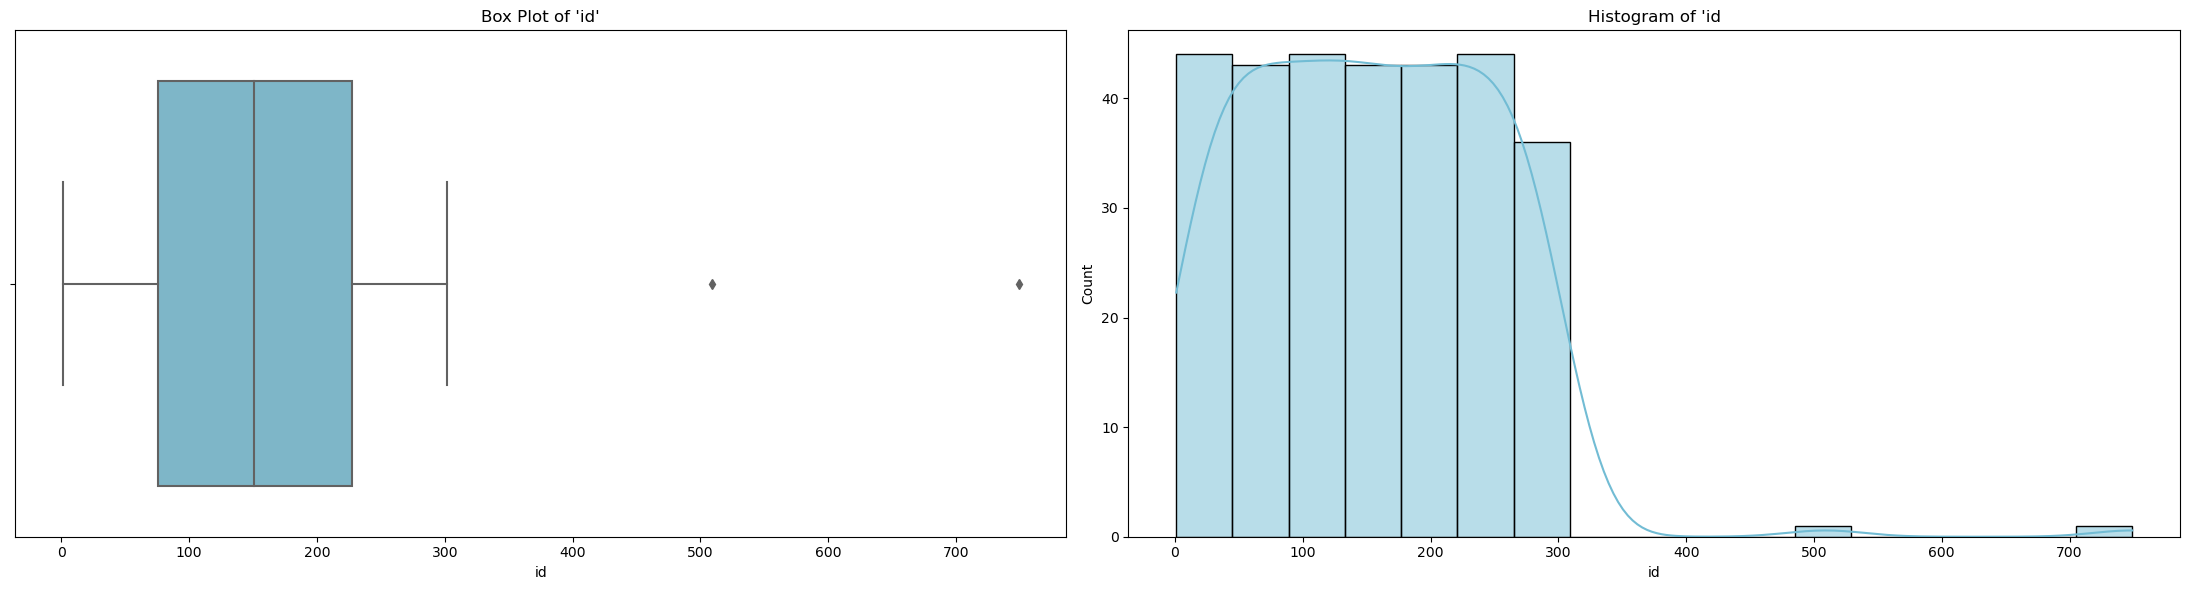

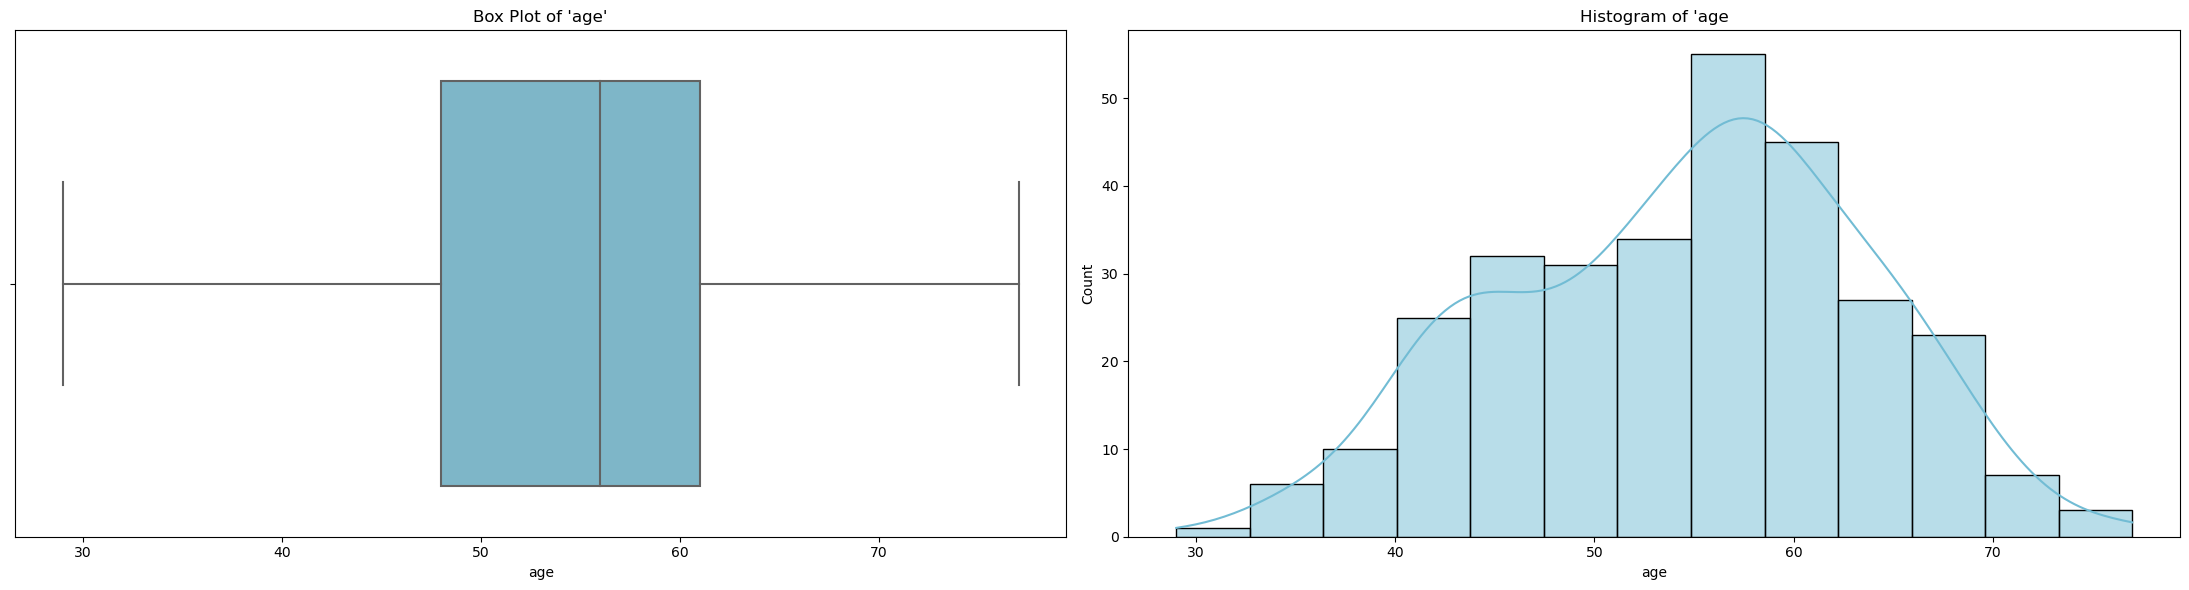

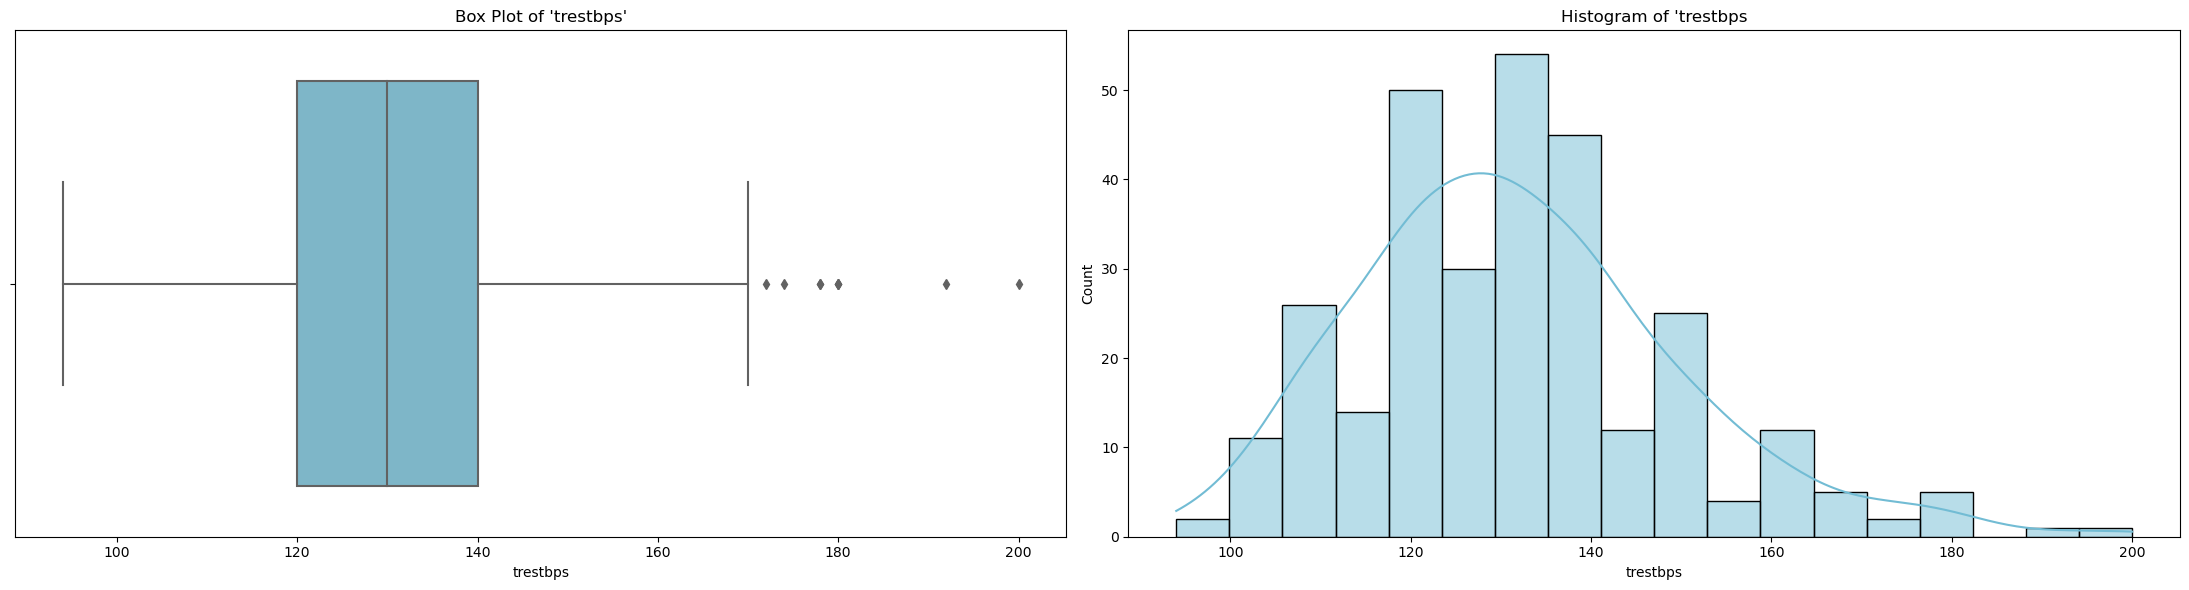

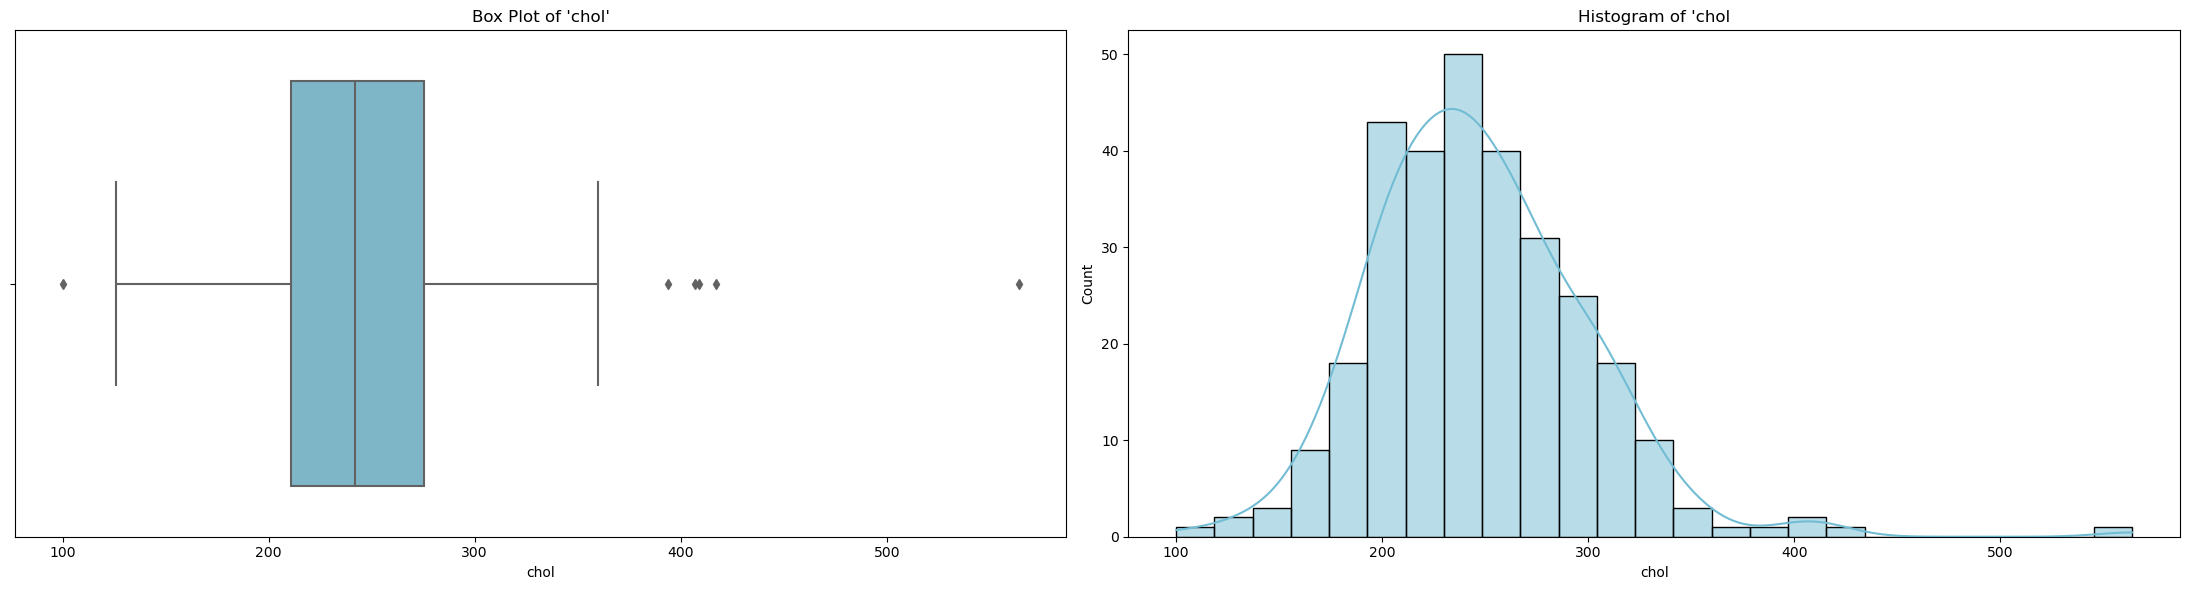

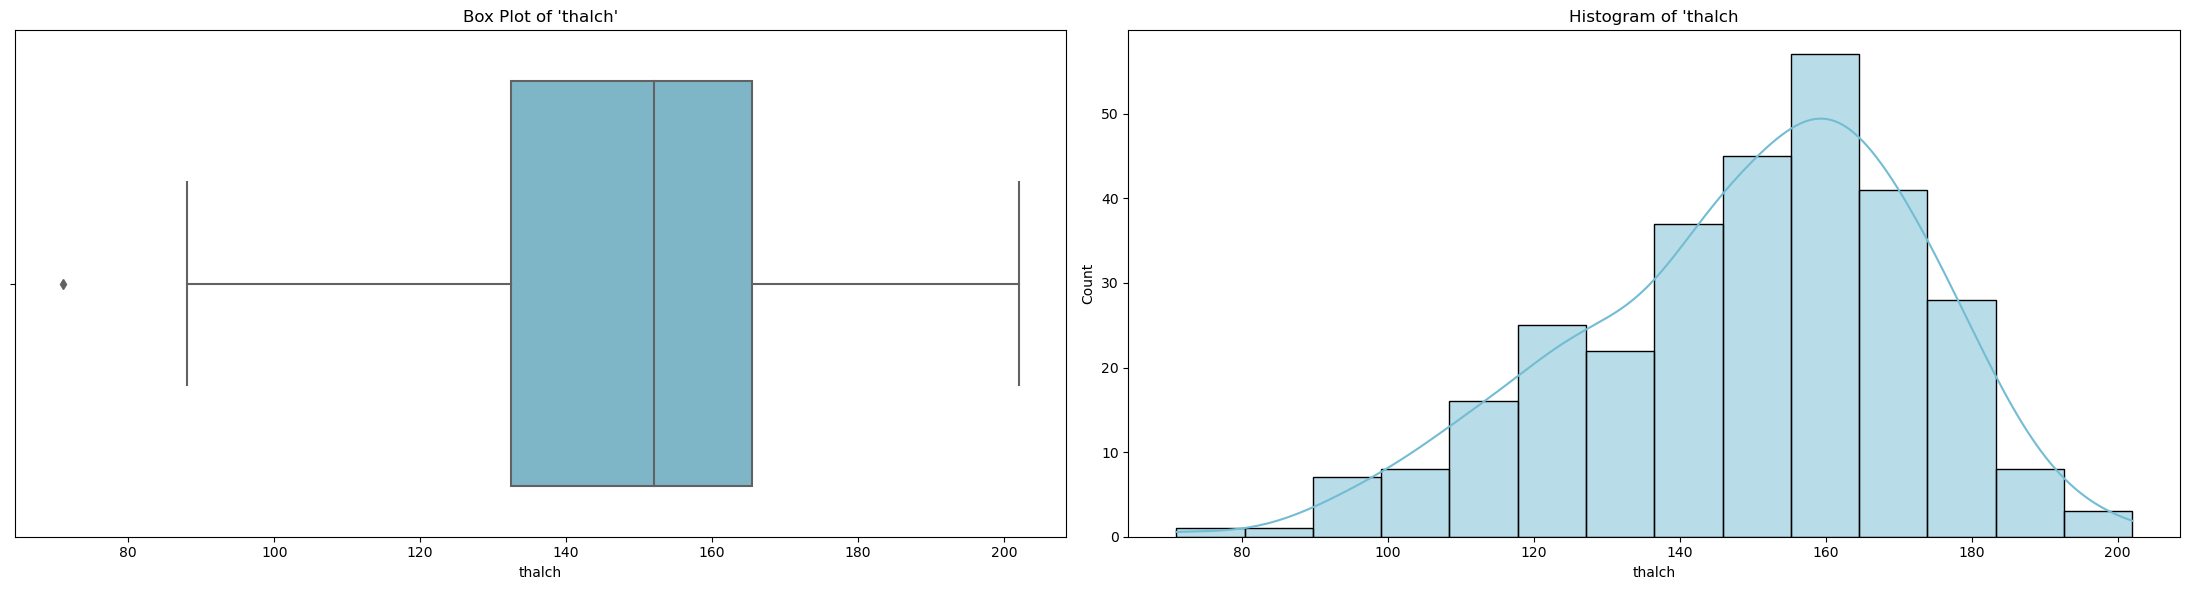

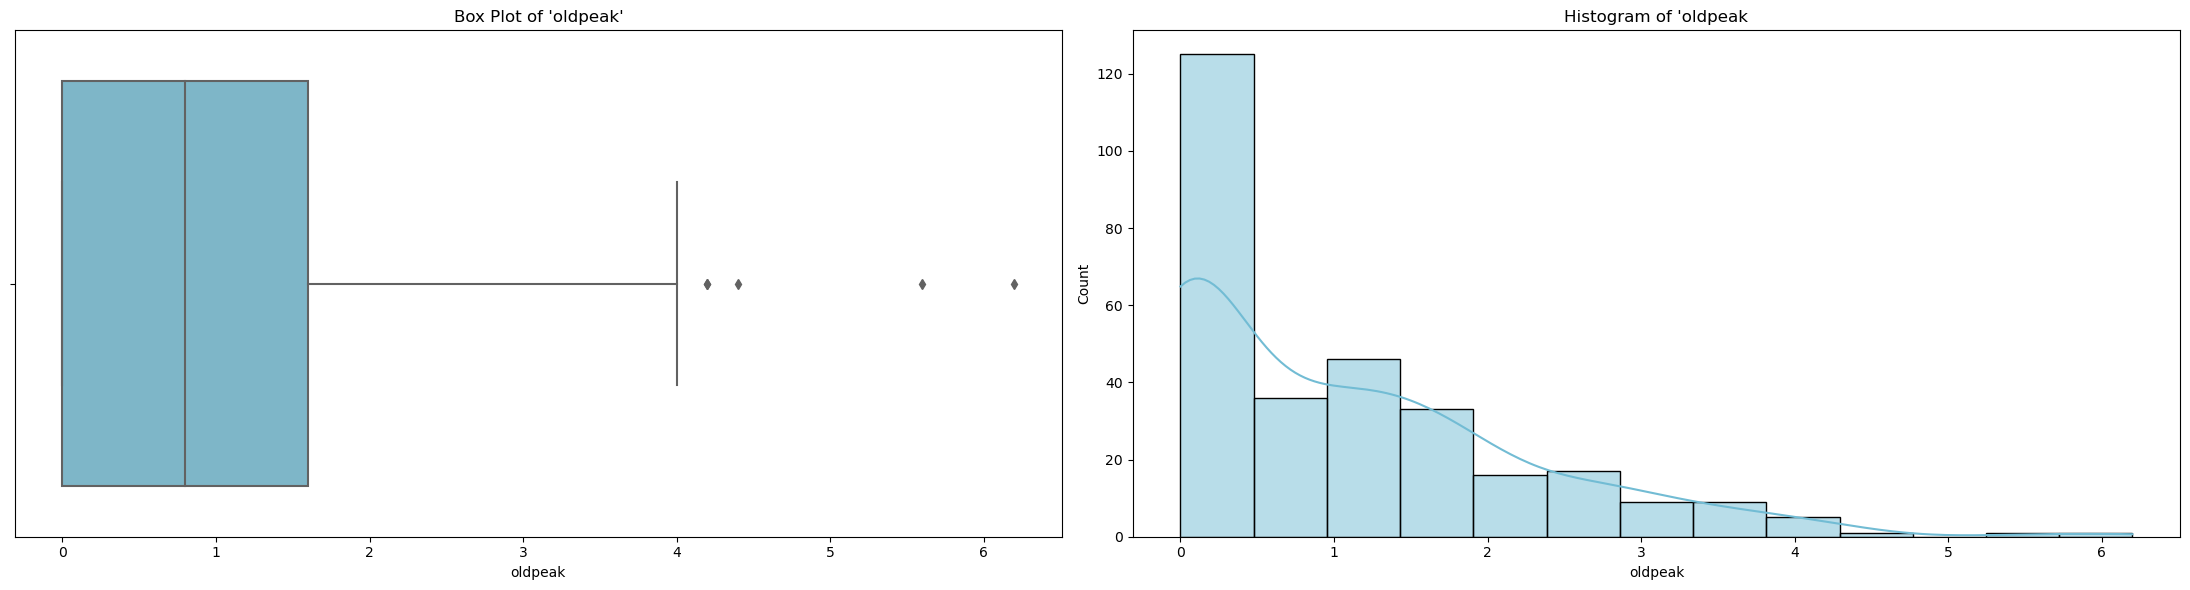

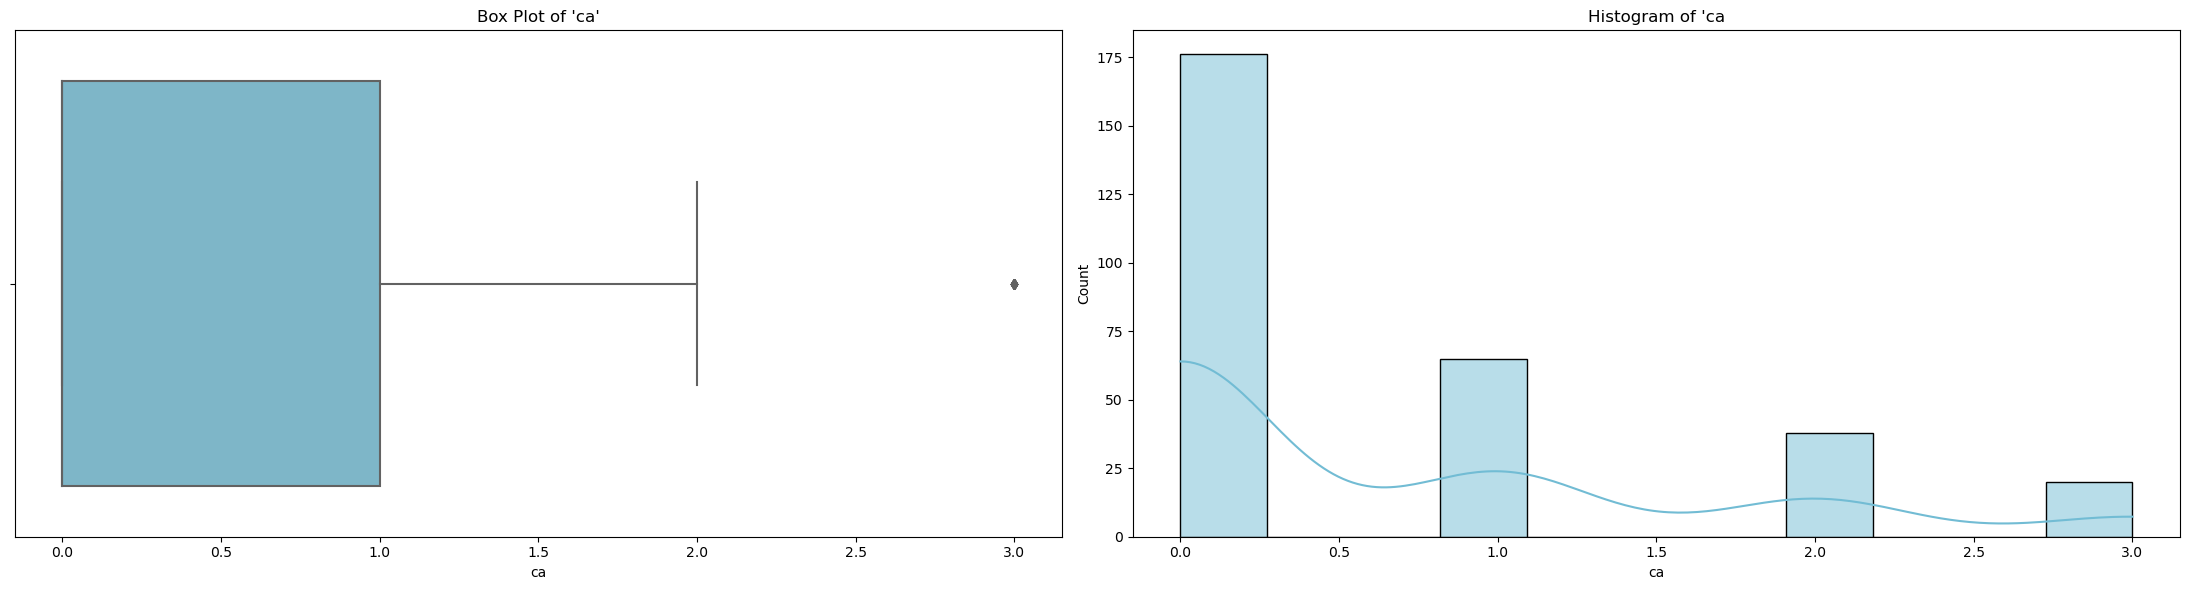

In [15]:
#def numerical_features_visualizations(numerical_features):

def numerical_features_visualizations(col):
        fig,(ax1, ax2) = plt.subplots(ncols=2, figsize=(22,6))
        custom_color = "#72bcd4"
        # boxplots
        sns.boxplot(x=heart_disease[col], color=custom_color, ax=ax1)
        ax1.set_title(f"Box Plot of '{col}'")
        # histplots
        sns.histplot(x=heart_disease[col], kde=True, color=custom_color, ax=ax2)
        ax2.set_title(f"Histogram of '{col}")
        plt.tight_layout()

  
 #loop for numerical features
for col in numerical_features:
    numerical_features_visualizations(col)



#### Categorical Visualizations 

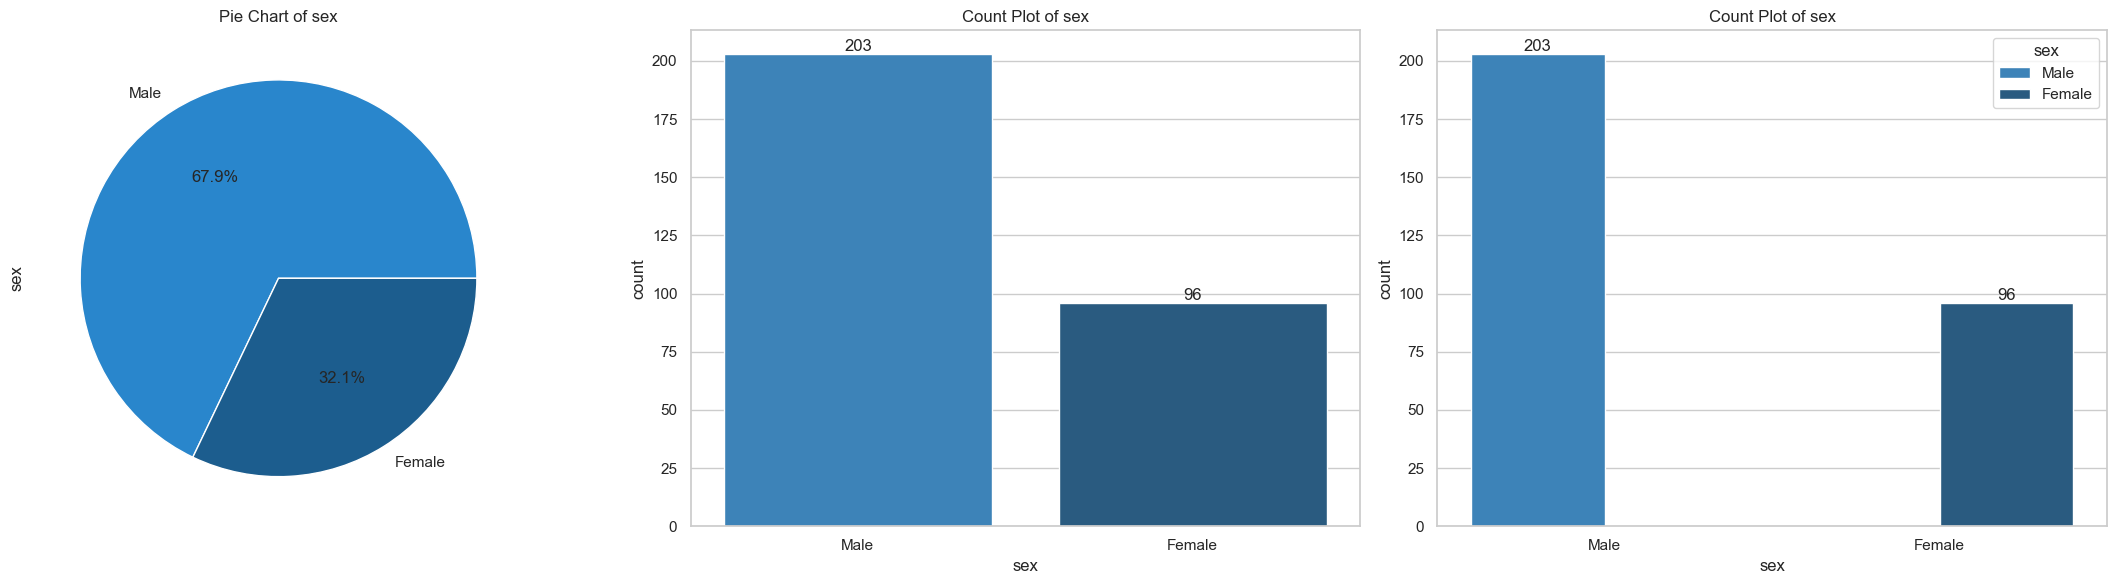

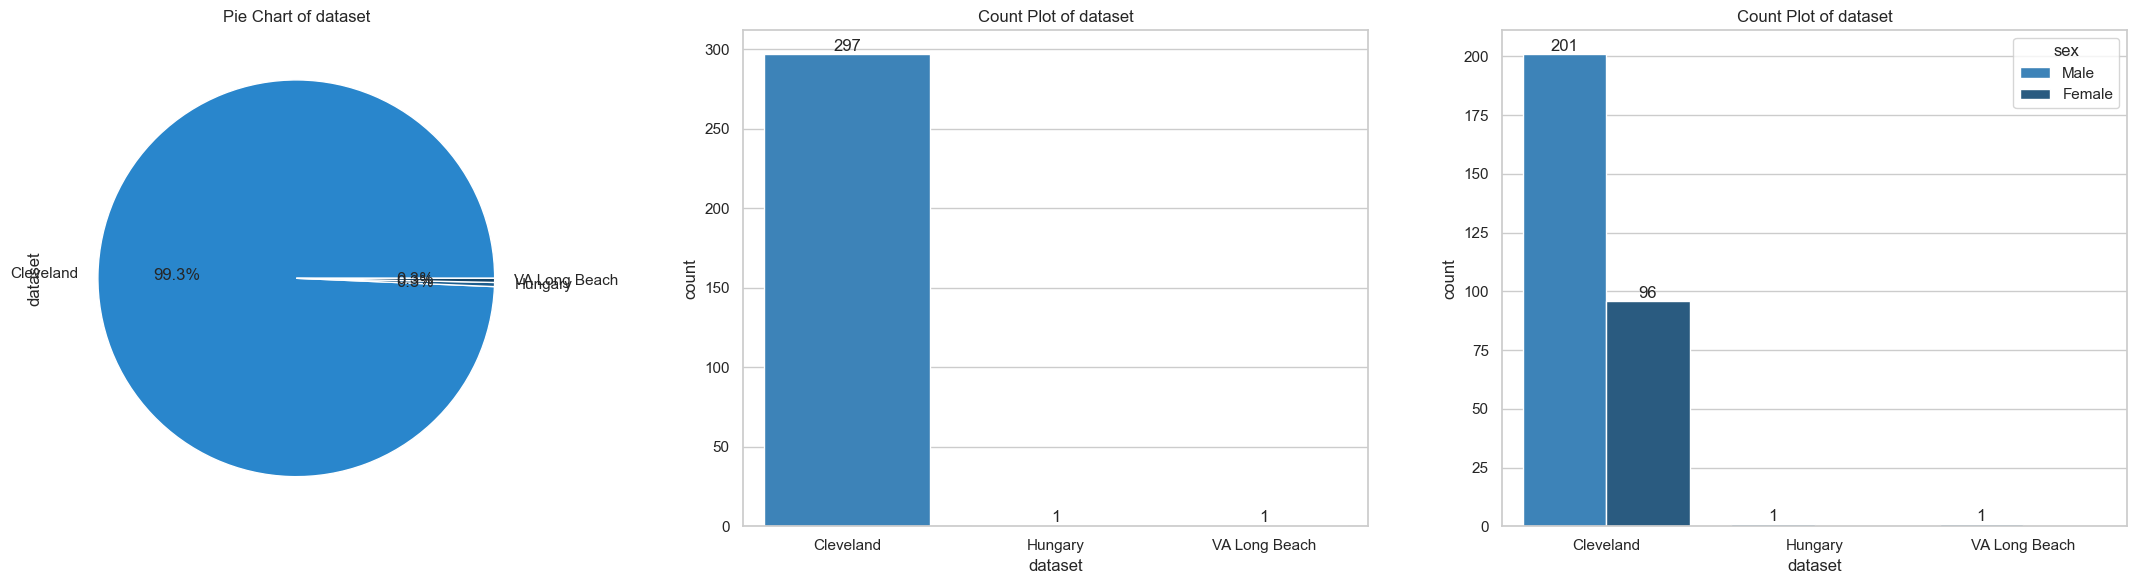

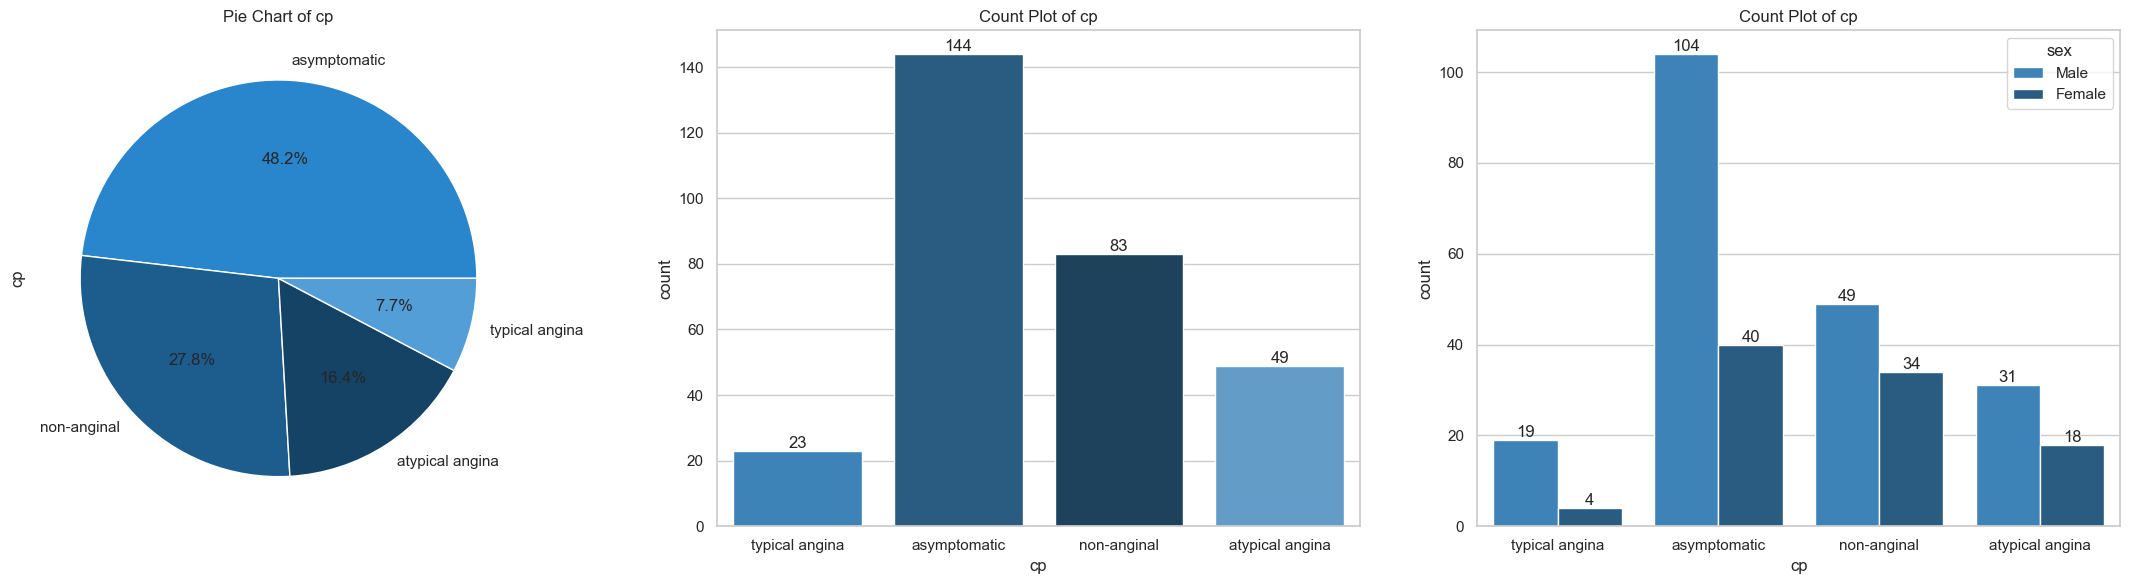

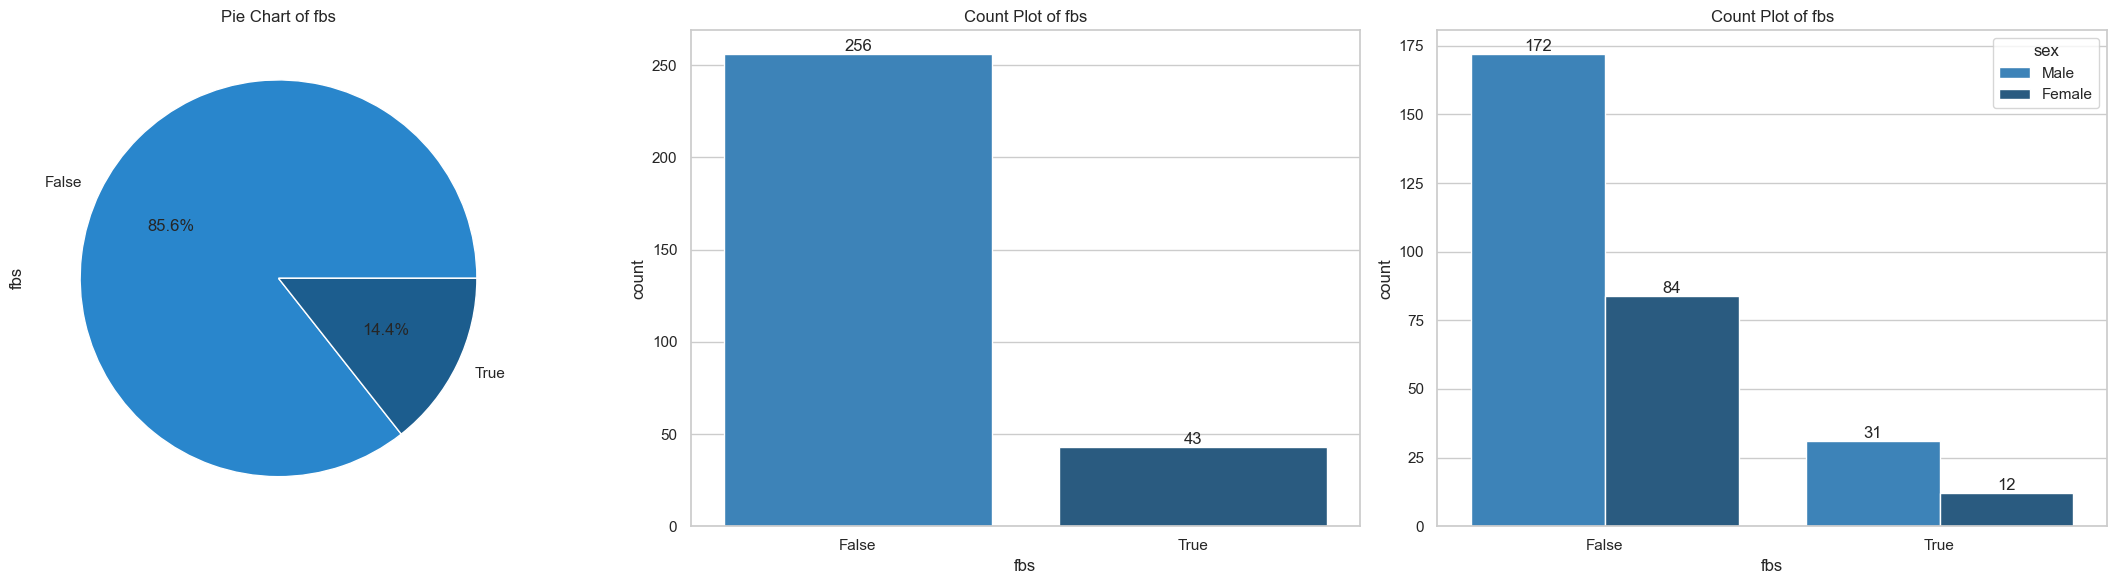

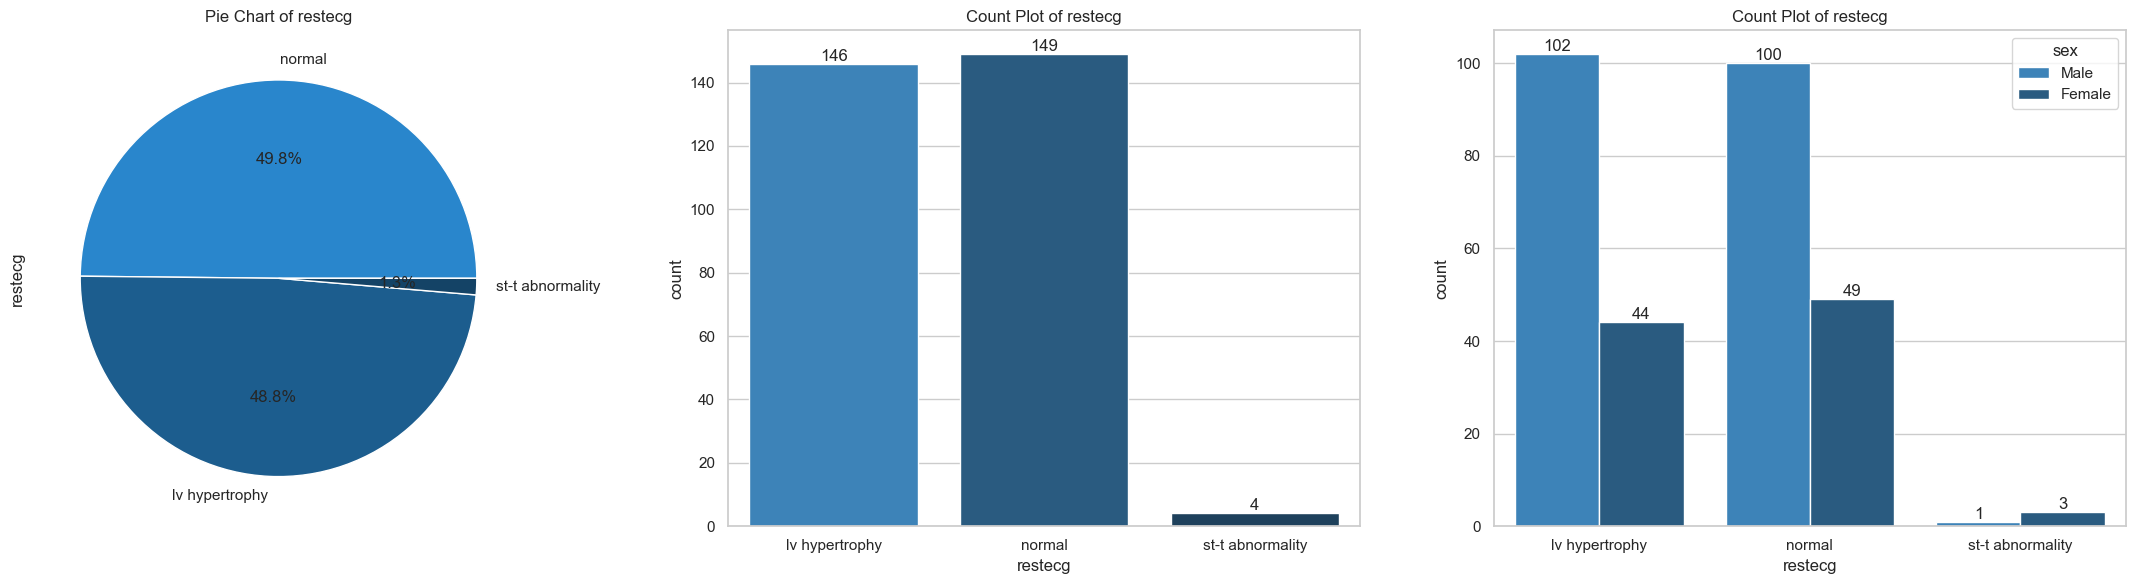

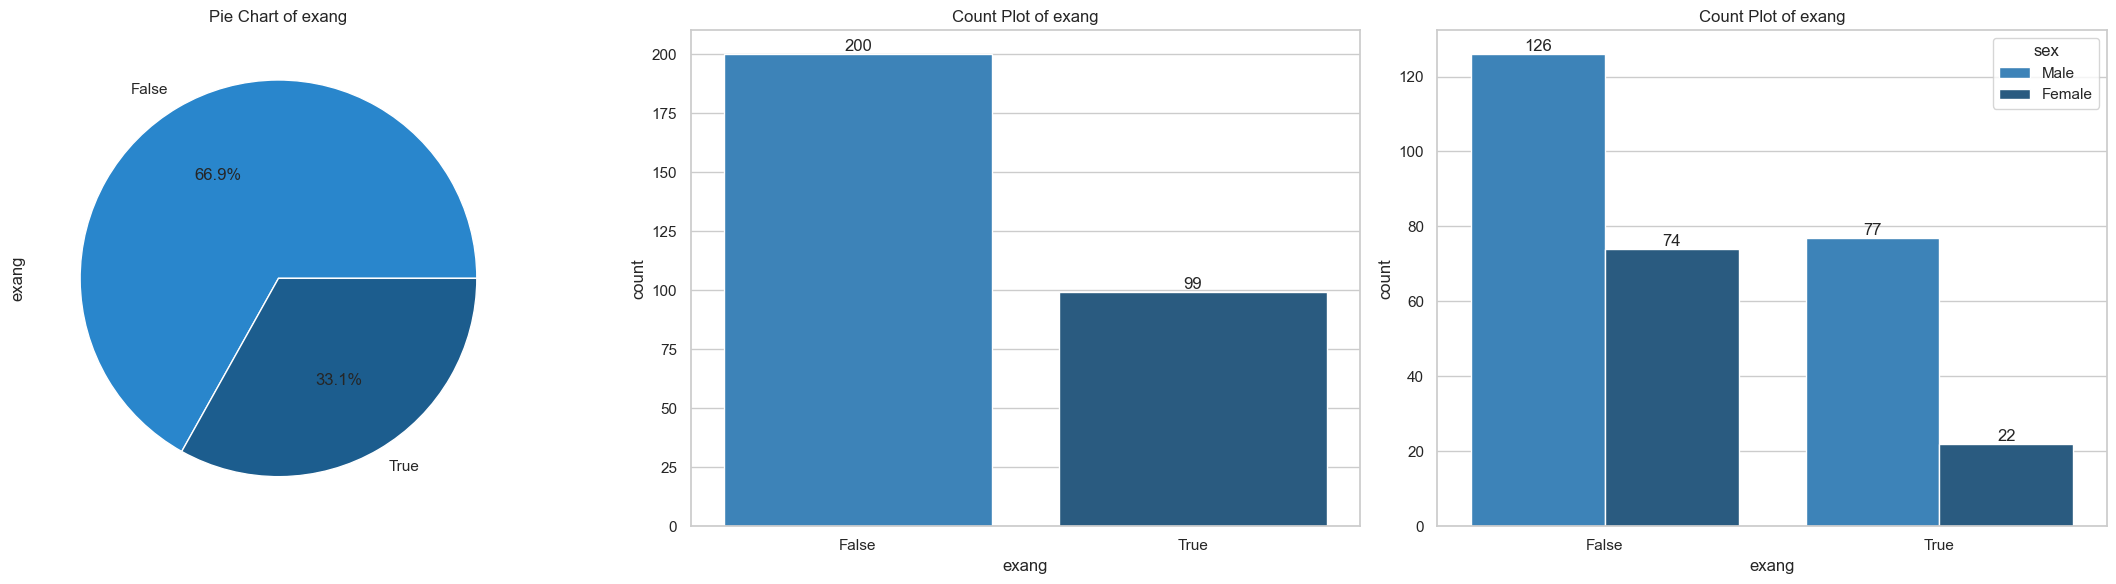

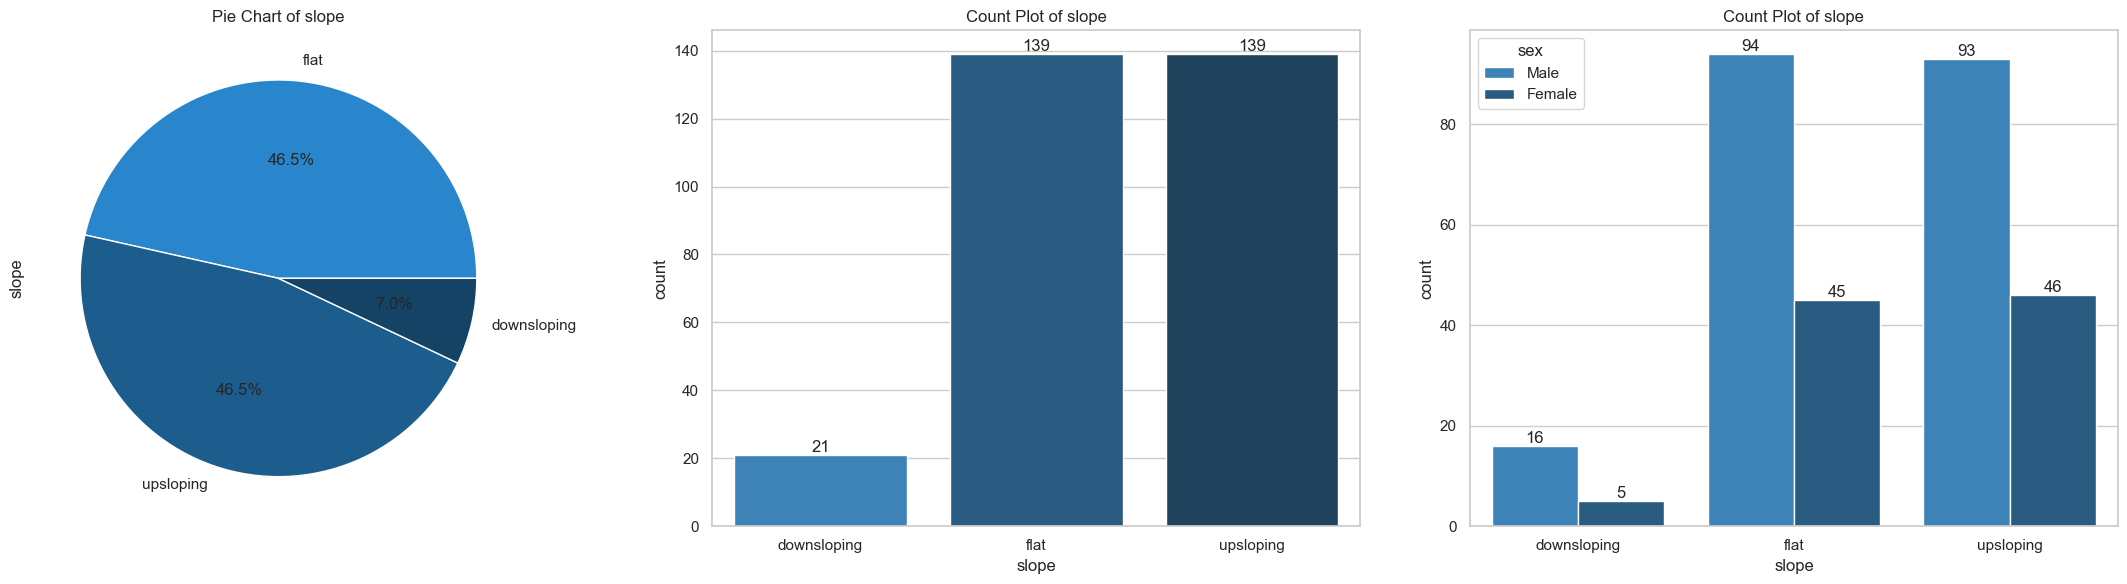

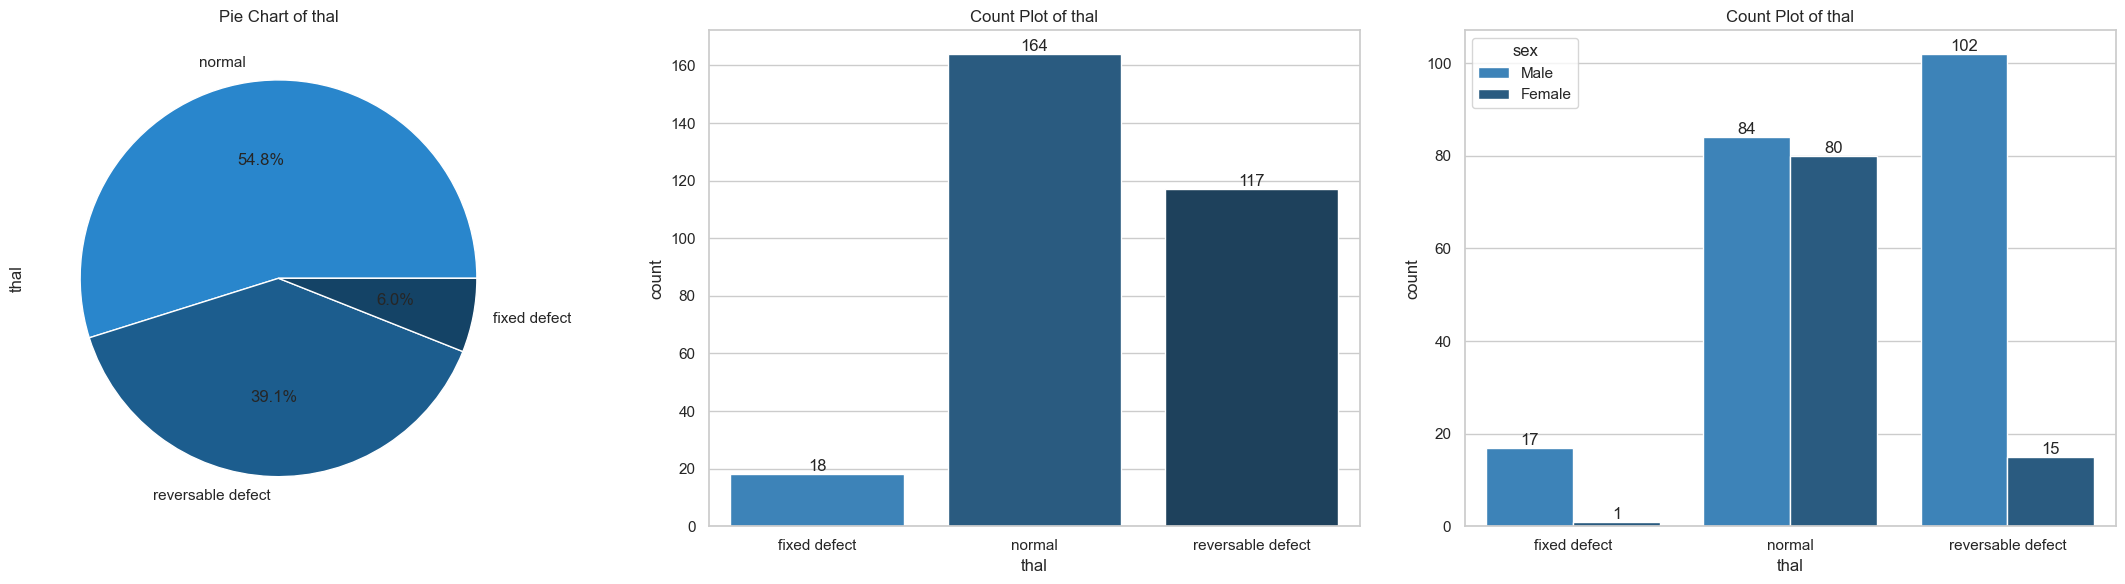

In [257]:
# create function plot visuals
def categorical_features_visualizations(col):
    fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(22,6))
    # pie chart
    custom_palette = ['#2986cc','#1c5d8e','#144366','#539ed6','#7eb6e0']
    heart_disease[col].value_counts().plot(kind="pie", autopct="%.1f%%", colors=custom_palette, ax=ax1)
    ax1.set_title(f"Pie Chart of {col}")
    
    # count plot
    custom_palette = ['#2986cc','#1c5d8e','#144366','#539ed6','#7eb6e0']
    figure = sns.countplot(x=heart_disease[col], palette=custom_palette, ax=ax2)
    for bar in figure.containers:
        figure.bar_label(bar)
    ax2.set_title(f"Count Plot of {col}")
    
    # count plot with hue of 'age' column
    figure = sns.countplot(x=heart_disease[col], palette=custom_palette, hue=heart_disease["sex"], ax=ax3)
    for bar in figure.containers:
        figure.bar_label(bar)
    ax3.set_title(f"Count Plot of {col}")
    plt.tight_layout()
    plt.show()


# loop for object features
for col in object_features:
    categorical_features_visualizations(col)

#### Target Variable Visualization

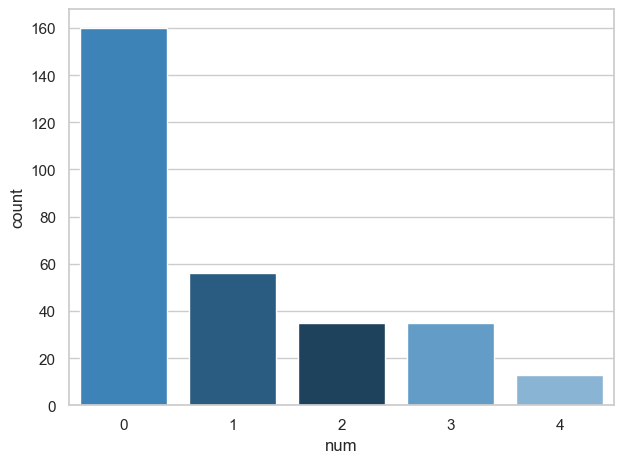

In [262]:
custom_palette = ['#2986cc','#1c5d8e','#144366','#539ed6','#7eb6e0']
sns.countplot(heart_disease['num'], palette= custom_palette)
plt.tight_layout()
plt.show()

### Objective: To use and test different classification models to determine the highest accuracy for heart disease diagnosis. 


### Classification Modeling 

### Preprocessing 

In [152]:
hd = heart_disease
numerical = hd.select_dtypes(include = ['int64','float64']).columns
numerical
numbers = pd.DataFrame(data = numerical)
numbers

,0
0,id
1,age
2,trestbps
3,chol
4,thalch
5,oldpeak
6,ca
7,num


In [153]:
categorical = hd.select_dtypes(include = ['object']).columns
categorical
qual = pd.DataFrame(data = categorical)
qual

,0
0,sex
1,dataset
2,cp
3,fbs
4,restecg
5,exang
6,slope
7,thal


### Label Encoding and Train/Test Split

In [208]:
#Train/Test Split 
X = hd.drop('num', axis = 1)
y = hd['num']

#Label Encoder
label_encoder = LabelEncoder()

for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = label_encoder.fit_transform(X[col])
    else:
        pass

#Train/test split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)


### Baseline Model

In [251]:
#Baseline 

#Baseline Model with LogisticRegression

lor= LogisticRegression(random_state = 42)

#Fit the Model 
lor_fit = lor.fit(X_train, y_train)

#Y Pred

y_pred = lor.predict(X_test)

#Accuracy 

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.6833333333333333


In [210]:
#Train Accuracy

y_pred_lor_train = lor.predict(X_train_fit)
accuracy_lor_train = accuracy_score(y_train, y_pred_lor_train)
accuracy_lor_train 

#Test Accuracy

y_pred_lor = lor.predict(X_test_trans)
accuracy_lor_test = accuracy_score(y_test,y_pred_lor)
accuracy_lor_test

print(accuracy_lor_train)
print(accuracy_lor_test)

0.6443514644351465
0.65


### Test Accuracy for Classification Models

In [249]:
models = [
    ('Random Forest', RandomForestClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__max_depth': [None, 10, 20]}),  
    ('Support Vector Machine', SVC(random_state=42, class_weight='balanced'),
        {'model__C': [0.1, 1, 10],
         'model__gamma': ['scale', 'auto']}), 
    ('K-Nearest Neighbors', KNeighborsClassifier(),
        {'model__n_neighbors': [3, 5, 7],
         'model__weights': ['uniform', 'distance']}),  
    ('Decision Tree', DecisionTreeClassifier(random_state=42),
        {'model__max_depth': [None, 10, 20],
         'model__min_samples_split': [2, 5, 10]}),  
    ('Naive Bayes', GaussianNB(), {}) 
]

best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model, param_grid in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Feature Scaling
        ('model', model)
    ])

    # Hyperparameter tuning using GridSearchCV
    if param_grid:
        grid_search = GridSearchCV(pipeline, param_grid, cv=5)
        grid_search.fit(X_train, y_train)
        pipeline = grid_search.best_estimator_

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Print the performance metrics
    print("Model:", name)
    print("Test Accuracy:", accuracy)
    print()

    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the overall best model
print("Best Model:")
print("Test Accuracy:", best_accuracy)
print("Model Pipeline:", best_model, "with accuracy", best_accuracy.round(2), "%")

Model: Random Forest
Test Accuracy: 0.6333333333333333

Model: Support Vector Machine
Test Accuracy: 0.38333333333333336

Model: K-Nearest Neighbors
Test Accuracy: 0.5833333333333334

Model: Decision Tree
Test Accuracy: 0.5833333333333334

Model: Naive Bayes
Test Accuracy: 0.5833333333333334

Best Model:
Test Accuracy: 0.6333333333333333
Model Pipeline: Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 RandomForestClassifier(max_depth=10, n_estimators=50,
                                        random_state=42))]) with accuracy 0.63 %


#### Random Forest Classifer was found to be the most model for test accuracy. 

### Next Steps 

### In order to improve modeling outcomes, I need to do: 
### - more research on hyperparameters for the classification models to improve test accuracy. 
### - create a deep learning model like the Neural Network and a few more classification models
### - need to incorporate precision, recall, and f1 scoring since medical classification models typically encounter these measures
 